In [2]:
import pandas as pd 
import numpy as np

In [3]:
#IMPORTATION DE FICHIERS VENTES
df_clts= pd.read_csv("DATA_P4/customers.csv")
df_pdts= pd.read_csv("DATA_P4/products.csv")
df_trans= pd.read_csv("DATA_P4/transactions.csv")

# Analyse exploratoire 

## Données clients 

In [4]:
df_clts.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
# Dimension
df_clts.shape 

(8623, 3)

In [6]:
## Les informations globales des jeux de données
df_clts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [7]:
## existance de valeurs nulles 
df_clts.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [8]:
## identification de la clé primaire 
df_clts['client_id'].nunique()==len(df_clts)

True

In [9]:
print('la colonne client_id est la clé primaine de la df_clts') 

la colonne client_id est la clé primaine de la df_clts


## Analyse donnnees produits

In [10]:
df_pdts.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [11]:
df_pdts.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [12]:
df_pdts.shape

(3287, 3)

In [13]:
## identification de la clé primaire
df_pdts['id_prod'].nunique()==len(df_pdts)

True

In [14]:
print('la colonne id_prod est la clé primaire') 

la colonne id_prod est la clé primaire


In [15]:
df_pdts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [16]:
df_pdts['categ'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
print('on a trois catégories de produits')

on a trois catégories de produits


In [18]:
df_pdts['price'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [19]:
print('le montant minimum est de -1')

le montant minimum est de -1


In [20]:
df_pdts[df_pdts['price']==-1]

,id_prod,price,categ
731,T_0,-1.0,0


# Analyse des donnees ventes

In [21]:
df_trans.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [22]:
df_trans.shape

(337016, 4)

In [23]:
df_trans.describe(include=['O'])

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [24]:
df_trans.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [25]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [26]:
df_trans['session_id'].nunique()==len(df_trans)

False

In [27]:
#df_trans[['date','heure']]= df_trans['date'].str.split(expand=True)

In [28]:
df_trans.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [29]:
cmd_clts = pd.merge(df_clts, df_trans, on= 'client_id', how='outer', indicator=True)
cmd_clts

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,both
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,both
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,both
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,both
...,...,...,...,...,...,...,...
337032,c_84,f,1982,1_459,2022-02-17 00:16:56.629536,s_166337,both
337033,c_84,f,1982,0_1050,2021-09-20 10:05:37.086910,s_92701,both
337034,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960,both
337035,c_84,f,1982,1_343,2021-04-13 03:59:33.614841,s_19845,both


In [30]:
cmd_clts['_merge'].unique()

['both', 'left_only']
Categories (2, object): ['both', 'left_only']

In [31]:
# REGARDONS LES LIGNES QUI NE MATCHENT PAS 
clts_sans_cmd= cmd_clts[cmd_clts['_merge']=='left_only']
len(clts_sans_cmd)

21

In [32]:
print("il y 21 clients dont les transtactions ne sont pas enregistrées ou ils n'ont pas fait d'achat")

il y 21 clients dont les transtactions ne sont pas enregistrées ou ils n'ont pas fait d'achat


In [33]:
cmd_clts= cmd_clts[cmd_clts['_merge']=='both']

In [34]:
cmd_clts.drop('_merge',axis=1, inplace=True)

C:\Users\sfakh\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
cmd_clts.isnull().sum()

client_id     0
sex           0
birth         0
id_prod       0
date          0
session_id    0
dtype: int64

In [36]:
data1 = pd.merge(df_pdts, cmd_clts, on='id_prod', how='outer', indicator=True)
data1.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
0,0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727,both
1,0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134,both
2,0_1421,19.99,0.0,c_3060,m,1971.0,2021-04-06 09:35:05.954975,s_16742,both
3,0_1421,19.99,0.0,c_7946,f,1987.0,2021-10-26 00:06:47.812612,s_110147,both
4,0_1421,19.99,0.0,c_1934,f,2004.0,2021-12-23 00:10:38.256002,s_138491,both


In [37]:
data1['_merge'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['both', 'left_only', 'right_only']

In [38]:
data1[data1['_merge']=='left_only']

,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
19685,0_1016,35.06,0.0,NaN,NaN,NaN,NaN,NaN,left_only
31123,0_1780,1.67,0.0,NaN,NaN,NaN,NaN,NaN,left_only
81098,0_1062,20.08,0.0,NaN,NaN,NaN,NaN,NaN,left_only
88424,0_1119,2.99,0.0,NaN,NaN,NaN,NaN,NaN,left_only
90239,0_1014,1.15,0.0,NaN,NaN,NaN,NaN,NaN,left_only
93644,1_0,31.82,1.0,NaN,NaN,NaN,NaN,NaN,left_only
114736,0_1318,20.92,0.0,NaN,NaN,NaN,NaN,NaN,left_only
126173,0_1800,22.05,0.0,NaN,NaN,NaN,NaN,NaN,left_only
144352,0_1645,2.99,0.0,NaN,NaN,NaN,NaN,NaN,left_only
159469,0_322,2.99,0.0,NaN,NaN,NaN,NaN,NaN,left_only


In [39]:
print(f"il y a {len(data1[data1['_merge']=='left_only'])} produits qui sont soit non vendus soit vendus mais non enregistrés") 

il y a 22 produits qui sont soit non vendus soit vendus mais non enregistrés


In [40]:
data1= data1[data1['_merge']!='left_only']

In [41]:
data1[data1['_merge']=='right_only']

,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
336935,0_2245,NaN,NaN,c_4505,m,1976.0,2022-01-09 09:23:31.000720,s_147220,right_only
336936,0_2245,NaN,NaN,c_3468,f,1981.0,2021-09-11 10:52:05.205583,s_88251,right_only
336937,0_2245,NaN,NaN,c_1403,f,1978.0,2022-02-15 14:26:50.187952,s_165575,right_only
336938,0_2245,NaN,NaN,c_3065,f,1977.0,2022-01-26 13:34:33.440366,s_155484,right_only
336939,0_2245,NaN,NaN,c_7102,m,1983.0,2021-04-25 19:58:42.716401,s_25704,right_only
...,...,...,...,...,...,...,...,...,...
337033,0_2245,NaN,NaN,c_8138,f,1984.0,2021-10-04 21:20:27.540982,s_100047,right_only
337034,0_2245,NaN,NaN,c_7416,m,1933.0,2021-11-12 09:25:22.905886,s_118458,right_only
337035,0_2245,NaN,NaN,c_4283,f,1976.0,2021-09-01 02:46:38.931757,s_83377,right_only
337036,0_2245,NaN,NaN,c_6236,f,1976.0,2022-02-25 00:08:08.736068,s_170426,right_only


In [42]:
print(f"il y a {len(data1[data1['_merge']=='right_only'])} des ventes sans prix et catégoie ") 

il y a 103 des ventes sans prix et catégoie 


In [43]:
data1[data1['_merge']=='right_only']['id_prod'].unique()

array(['0_2245'], dtype=object)

In [44]:
data1['categ'].fillna(0, inplace=True)

In [45]:
data1.isnull().sum()

id_prod         0
price         103
categ           0
client_id       0
sex             0
birth           0
date            0
session_id      0
_merge          0
dtype: int64

In [46]:
mean_categ_0 = data1[data1['categ']==0]['price'].mean()

In [47]:
data1['price'].fillna(mean_categ_0, inplace=True)

In [48]:
data1.isnull().sum()

id_prod       0
price         0
categ         0
client_id     0
sex           0
birth         0
date          0
session_id    0
_merge        0
dtype: int64

In [49]:
data1.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
0,0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727,both
1,0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134,both
2,0_1421,19.99,0.0,c_3060,m,1971.0,2021-04-06 09:35:05.954975,s_16742,both
3,0_1421,19.99,0.0,c_7946,f,1987.0,2021-10-26 00:06:47.812612,s_110147,both
4,0_1421,19.99,0.0,c_1934,f,2004.0,2021-12-23 00:10:38.256002,s_138491,both


In [50]:
data1.isnull().sum()

id_prod       0
price         0
categ         0
client_id     0
sex           0
birth         0
date          0
session_id    0
_merge        0
dtype: int64

In [59]:
data1[data1['price']<0]

,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
80855,T_0,-1.0,0.0,ct_0,f,2001.0,test_2021-03-01 02:30:02.237441,s_0,both
80856,T_0,-1.0,0.0,ct_0,f,2001.0,test_2021-03-01 02:30:02.237443,s_0,both
80857,T_0,-1.0,0.0,ct_0,f,2001.0,test_2021-03-01 02:30:02.237442,s_0,both
80858,T_0,-1.0,0.0,ct_0,f,2001.0,test_2021-03-01 02:30:02.237426,s_0,both
80859,T_0,-1.0,0.0,ct_0,f,2001.0,test_2021-03-01 02:30:02.237434,s_0,both
...,...,...,...,...,...,...,...,...,...
81050,T_0,-1.0,0.0,ct_1,m,2001.0,test_2021-03-01 02:30:02.237416,s_0,both
81051,T_0,-1.0,0.0,ct_1,m,2001.0,test_2021-03-01 02:30:02.237425,s_0,both
81052,T_0,-1.0,0.0,ct_1,m,2001.0,test_2021-03-01 02:30:02.237423,s_0,both
81053,T_0,-1.0,0.0,ct_1,m,2001.0,test_2021-03-01 02:30:02.237421,s_0,both


In [60]:
data_final = data1[data1['price']>0]

In [64]:
data_final.drop(['_merge'], axis=1, inplace=True)

C:\Users\sfakh\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
data_final.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727
1,0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134
2,0_1421,19.99,0.0,c_3060,m,1971.0,2021-04-06 09:35:05.954975,s_16742
3,0_1421,19.99,0.0,c_7946,f,1987.0,2021-10-26 00:06:47.812612,s_110147
4,0_1421,19.99,0.0,c_1934,f,2004.0,2021-12-23 00:10:38.256002,s_138491


In [67]:
data_final.to_csv('DATA_P4/data_final.csv', index=False)

In [68]:
data1.groupby(by=['categ']).mean()

,price,birth
categ,,
0.0,10.635716,1978.123702
1.0,20.480106,1974.340876
2.0,75.174949,1996.271821


In [55]:
data1.groupby(by=['price']).mean()

,categ,birth
price,,
-1.00,0.0,2001.000000
0.62,0.0,1977.428571
0.66,0.0,1977.125000
0.77,0.0,1982.333333
0.81,0.0,1988.142857
...,...,...
233.54,2.0,1999.666667
236.99,2.0,1997.744681
247.22,2.0,1997.575758


In [56]:
data1.groupby(by=['birth']).mean()

,price,categ
birth,,
1929.0,15.116628,0.593023
1930.0,17.637826,0.634783
1931.0,17.058571,0.583333
1932.0,16.264717,0.547170
1933.0,16.113754,0.573171
...,...,...
2000.0,36.832439,1.096552
2001.0,37.939731,1.079749
2002.0,40.431950,1.178957


In [57]:
data1.groupby(by=['price']).var()

,categ,birth
price,,
-1.00,0.0,0.000000
0.62,0.0,228.109890
0.66,0.0,81.267857
0.77,0.0,32.333333
0.81,0.0,56.809524
...,...,...
233.54,0.0,16.333333
236.99,0.0,67.460993
247.22,0.0,40.586480


TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

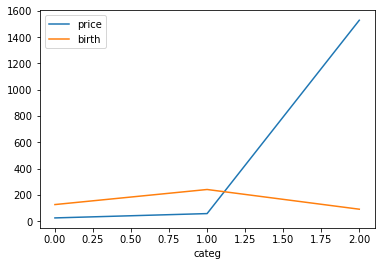

In [58]:
data1.groupby(by=['categ']).var().bar()

In [ ]:
data1['sex'].hist()

In [ ]:
data1.groupby(by=['sex']).mean()

<AxesSubplot:xlabel='sex'>

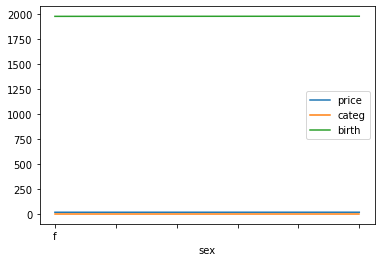

In [163]:
data1.groupby(by=['sex']).mean().plot()

<AxesSubplot:>

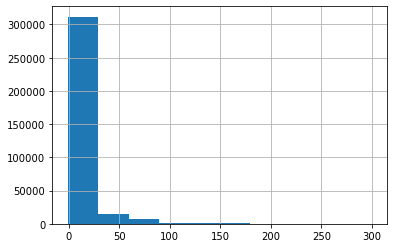

In [68]:
data1['price'].hist()

<AxesSubplot:>

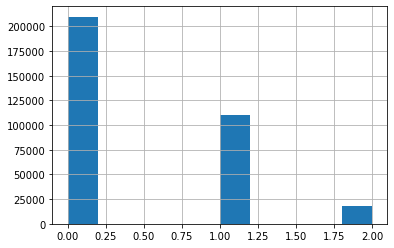

In [69]:
data1['categ'].hist()

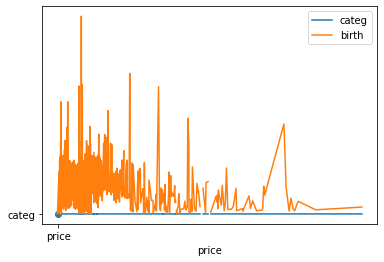

In [150]:
data1.groupby(by=['price']).var().plot().scatter(x='price', y='categ')

In [86]:
data1.groupby(by=['price','sex','categ']).mean()

birth
price   sex categ             
-1.00   f   0.0    2001.000000
        m   0.0    2001.000000
 0.62   f   0.0    1973.000000
        m   0.0    1983.333333
 0.66   f   0.0    1984.000000
...                        ...
 247.22 m   2.0    1998.000000
 254.44 f   2.0    2004.000000
        m   2.0    1998.666667
 300.00 f   2.0    1998.000000
        m   2.0    1995.600000

[3064 rows x 1 columns]

array([[<AxesSubplot:title={'center':'birth'}>]], dtype=object)

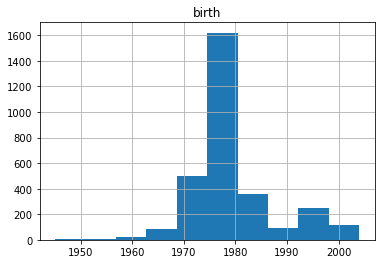

In [154]:
data1.groupby(by=['price','sex','categ']).mean().hist()